<a href="https://colab.research.google.com/github/SiddhanthNB/LMV-Co2-Emission/blob/master/fuel_consumption_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In this notebook, we will implement simple linear regression on `FuelConsumption.csv` dataset that is related to fuel consumption and Carbon dioxide emission of cars. 

## Getting Data and Packages



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



## Understanding the Data:


In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Quick EDA

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


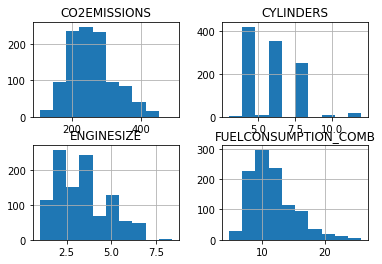

In [5]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

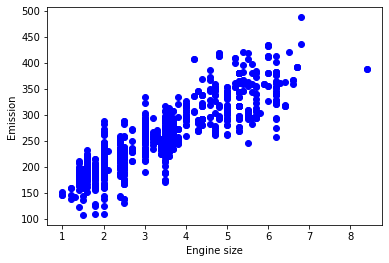

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

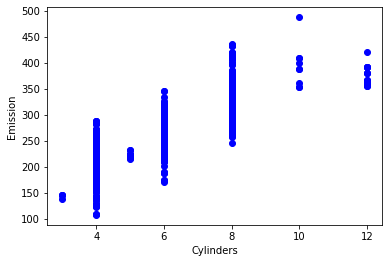

In [7]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

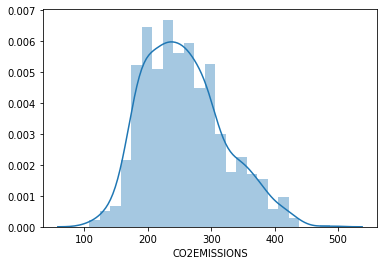

In [8]:
sns.distplot(cdf.CO2EMISSIONS)

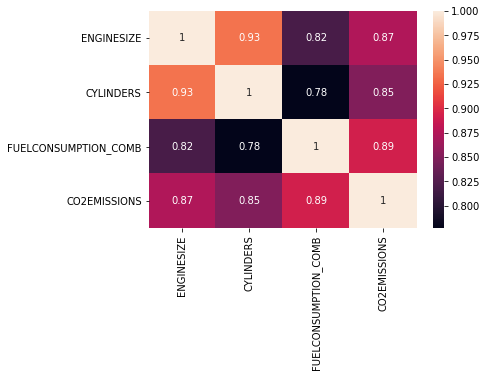

In [9]:
corr = cdf.corr()
sns.heatmap(corr, annot=True)

## Regression Analysis

#### Features and Targets

In [10]:
cdf.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS'], dtype='object')

In [11]:
X=cdf.iloc[:, 0].values
y=cdf.iloc[:, -1].values
X=X.reshape(-1,1)

#### Splitting data into Train and Test data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

#### Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [14]:
y_pred = regressor.predict(X_test)

#### Metrics

In [15]:
print(f'Incercept Value: {regressor.intercept_}')
print (f'Coefficient: {regressor.coef_}')

Incercept Value: 124.87069607648735
Coefficient: [39.22194766]


In [16]:
from sklearn import metrics
from sklearn.metrics import r2_score

print(f'MAE: {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')

print("R2-score: %.2f" % r2_score(y_pred , y_test) )

MAE: 22.282164612542513
MSE: 863.4295049066782
RMSE: 29.38417099233324
R2-score: 0.74


#### Comapring predictions with targets

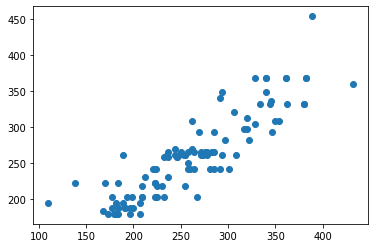

In [17]:
plt.scatter(y_test, y_pred)

We can see a linear relation between predictions and targets. Proving that our model is making precise predictions.

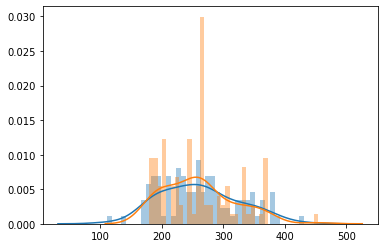

In [18]:
sns.distplot((y_test), bins=40)
sns.distplot((y_pred), bins=40)

Looking at the above graph, we can say that predicted values fairly superimpose with test values(targets) which proves that our model indeed makes a good fit.